# Mid-semester assignment Part 2 - Basics of deep learning
Hello dear students,<br> this is the template notebook. Please upload it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1: Oz Gemer 208426460
<br>
Student 2: Ofir Gur Cohen 206588642

## Fashion MNIST with Pytorch
Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://i.postimg.cc/RVVCnL8w/mnist-fa-torch.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

<br>

Goodluck!

# Import Libraries

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.utils import data
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import torchvision
import itertools
from torch.utils.data import DataLoader, RandomSampler
from torch import optim
from google.colab import drive

device = "cuda" if torch.cuda.is_available() else "cpu"
!gdown --id 1eK_D8v71BPK_lSdc9du_M3xK9tGBcQO1
!gdown --id 1ZdoMtDy9Di0NH9EWIaAy1dwYaPqYsy2x
!gdown --id 1bl1RKHroQtmOr9KiL7IMRtcWSyqsNww2
print(f"Using {device} device")

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1eK_D8v71BPK_lSdc9du_M3xK9tGBcQO1
To: /content/DL2_p2.pt
100% 816k/816k [00:00<00:00, 150MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZdoMtDy9Di0NH9EWIaAy1dwYaPqYsy2x
To: /content/DL2_p1.pt
100% 33.0k/33.0k [00:00<00:00, 47.3MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bl1RK

# Neural Network with Pytorch part 1 (Binary Classification)

## Load Dataset

4422102/4422102 [==============================] - 0s 0us/step
(28, 28)


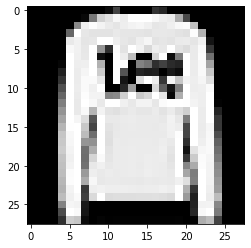

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_test[1].shape)
plt.imshow(X_test[1], cmap='gray')
plt.show()

## Data preprocessing

In [ ]:
# Feature scaling
X_train = X_train/255.0
X_test = X_test/255.0
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

Select two classes

In [ ]:
class1 = 2 # Pullover
class2 = 5 # Sandel

filtered_train_x = []
filtered_train_y = []
filtered_test_x = []
filtered_test_y = []

for i in range(len(y_train)):
  label = y_train[i]
  if label in [class1, class2]:
    filtered_train_x.append(X_train[i])
    filtered_train_y.append(0 if label == class1 else 1)

for i in range(len(y_test)):
  label = y_test[i]
  if label in [class1, class2]:
    filtered_test_x.append(X_test[i])
    filtered_test_y.append(0 if label == class1 else 1)

Use Pytorch data tools to preprocessed the row data<br>
Read about pytorch data tools here: https://pytorch.org/docs/stable/data.html

In [ ]:
class MyDataset(data.Dataset):
  def __init__(self,X,Y):
    self.X = X
    self.Y = Y
  def __len__(self):
    return len(self.Y)
  def __getitem__(self,index):
    X = self.X[index].float().reshape(-1)
    Y = self.Y[index].long()
    return X,Y

Splitting into datasets: train, test & validation
<br><i>(didnt really understand if validation is needed here so we added it anyways)</i>

In [ ]:
torch_train_x = torch.from_numpy(np.array(filtered_train_x)).float()
torch_train_y =  torch.from_numpy(np.array(filtered_train_y))

torch_test_x = torch.from_numpy(np.array(filtered_test_x)).float()
torch_test_y =  torch.from_numpy(np.array(filtered_test_y))

In [ ]:
torch_train_x, validation_x, torch_train_y, validation_y = train_test_split(filtered_train_x, filtered_train_y, test_size=0.2, random_state=42)

In [ ]:
train_dataset = MyDataset(torch.from_numpy(np.array(torch_train_x)).float(),torch.from_numpy(np.array(torch_train_y)))
train_loader_args = dict(shuffle=True,batch_size=256,num_workers=0)
train_loader = data.DataLoader(train_dataset, **train_loader_args)

validation_dataset = MyDataset(torch.from_numpy(np.array(validation_x)).float(),torch.from_numpy(np.array(validation_y)))
validation_loader_args = dict(shuffle = True,batch_size = 256, num_workers = 0)
validation_loader = DataLoader(validation_dataset, **validation_loader_args)

test_dataset = MyDataset(torch_test_x.data,torch_test_y.data)
test_loader_args = dict(shuffle=True,batch_size=256,num_workers=0)
test_loader = data.DataLoader(test_dataset, **test_loader_args)

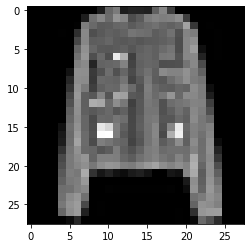

In [ ]:
plt.imshow(train_dataset.X.numpy()[0], cmap='gray')

### Build the network layers
Read about Fully connected layers in pytorch here: https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    layers = []
    layers.append(nn.Linear(28*28, 10))
    layers.append(nn.ReLU())
    layers.append(nn.Linear(10, 1))
    self.net = nn.Sequential(*layers)

  def forward(self, x):
    return self.net(x)

  def predict(self, data):
    predicted_y = []
    data = data.to(device)
    model = self
    for i in range(len(data)):
      prediction = model(data[i].reshape(-1)).item()
      predicted_y.append(0 if prediction < 0 else 1)
    return predicted_y

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)


### Build the Optimizer
Read about the Optimizer here: https://pytorch.org/docs/stable/optim.html

In [ ]:
optimizer = optim.SGD(model.parameters(), lr= 0.01)

### Loss Function
Read about Loss here: https://pytorch.org/docs/stable/optim.html

In [ ]:
loss = nn.BCEWithLogitsLoss()

### Training
Train your model, Don't forget to store the "loss" and "Accuracy" while training, you will have to show them later.<br>
Read about Loss here: https://pytorch.org/tutorials/beginner/introyt/trainingyt.html

In [ ]:
def train(model,train_loader,criterion,optimizer):
  model.train()
  model.to(device)
  running_loss = 0.0
  accuracy = 0.0
  for batch_idx,(data,target) in enumerate(train_loader):
    optimizer.zero_grad()
    data = data.to(device)
    target = target.to(device)
    outputs = model(data)
    outputs = outputs.reshape(-1)
    current_loss = criterion(outputs,target.float())
    running_loss += current_loss.item()

    current_loss.backward()
    optimizer.step()

    predicted = outputs
    predicted[predicted<0] = 0
    predicted[predicted>0] = 1
    accuracy += (predicted == target).sum().item()

  running_loss /= len(train_loader)
  accuracy = accuracy/(len(train_loader.dataset.Y))*100
  return running_loss,accuracy

In [ ]:
def validation(model,data_loader,criterion):
  with torch.no_grad():
    model.eval()
    model.to(device)
    running_loss = 0.0
    accuracy = 0
    for batch_idx,(data,target) in enumerate(data_loader):
      data = data.to(device)
      target = target.to(device)
      outputs = model(data)
      outputs = outputs.reshape(-1)
      current_loss = criterion(outputs.float(),target.float()).detach()
      running_loss += current_loss.item()

      predicted = outputs
      predicted[predicted<0] = 0
      predicted[predicted>0] = 1
      accuracy += (predicted == target).sum().item()

    running_loss /= len(data_loader)
    accuracy = (accuracy/len(data_loader.dataset.Y))*100.0
    return running_loss,accuracy

In [ ]:
numner_of_epochs = 15
eval_losses=[]
eval_accu=[]
validation_losses=[]
validation_accu=[]
for epoch in range(numner_of_epochs):
  train_loss,train_acc = train(model,train_loader,loss,optimizer)
  eval_losses.append(train_loss)
  eval_accu.append(train_acc)

  validation_loss, validation_acc = validation(model,validation_loader,loss)
  validation_losses.append(validation_loss)
  validation_accu.append(validation_acc)

print(eval_losses)
print(eval_accu)

[0.5800909384300834, 0.45496509341817154, 0.36252818138975845, 0.2834548809026417, 0.21733021814572184, 0.16880881276569867, 0.1343339152242008, 0.1103274608521085, 0.09314444602320068, 0.08033695307217147, 0.07080482554278876, 0.06279995910039074, 0.056791596702839196, 0.05198263347541031, 0.04798537845674314]
[51.17708333333333, 79.23958333333333, 95.73958333333333, 98.21875, 98.97916666666666, 99.30208333333333, 99.36458333333333, 99.41666666666666, 99.4375, 99.42708333333333, 99.4375, 99.45833333333334, 99.45833333333334, 99.44791666666667, 99.45833333333334]


### Save Trained model (weights)
Read about Save and load models in pytorch here: [https://pytorch.org/tutorials/beginner/saving_loading_models.html](https://pytorch.org/tutorials/beginner/saving_loading_models.html)


In [ ]:
%%script echo skipping
#drive.mount('/content/gdrive', force_remount = True)
PATH = "/content/gdrive/My Drive/DL/Assignment 2/DL2_p1.pt"
torch.save(model.state_dict(), PATH)

skipping


### Loss and Accuracy Visualization
Show  on plot the lose during training

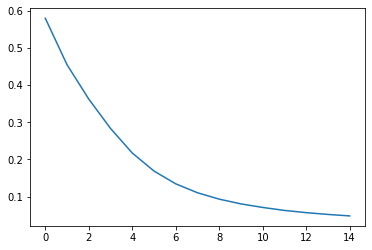

In [ ]:
plt.plot(eval_losses)

Show  on plot the accuracy during training

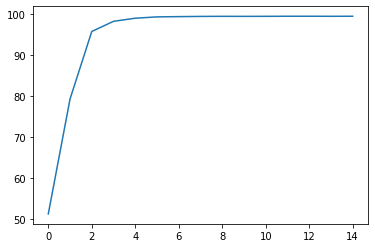

In [ ]:
plt.plot(eval_accu)

<h4>comparing train & validation statistics</h4>

In [ ]:
def compare(graph1,graph2,label):
  plt.plot(graph1,color='b',label='train'),plt.plot(graph2,color='r',label='val')
  plt.xlabel('epochs')
  plt.ylabel(label)
  plt.legend()

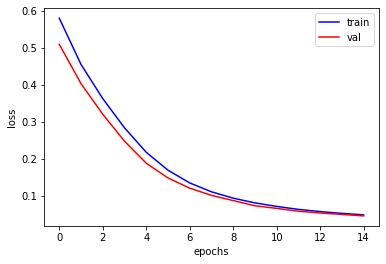

In [ ]:
compare(eval_losses,validation_losses,'loss')

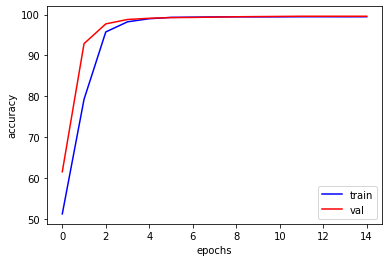

In [ ]:
compare(eval_accu,validation_accu,'accuracy')

<h3>Test</h3>
Test your model (Show accuracy by comparing the prediction VS the test label)

In [ ]:
predicted_y = model.predict(torch_test_x)
print("test accuracy:", accuracy_score(torch_test_y,predicted_y))

test accuracy: 0.997


### Model Evaluation
Show the model evaluation by presenting the confusion metrix in a representative way<br>
Read about confusion metrix visualization here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

Confusion Matrix


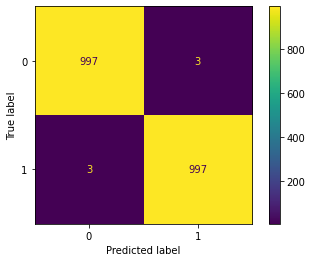

In [ ]:
cm = confusion_matrix(torch_test_y, predicted_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Classification Report

In [ ]:
labels = ['2','5']
report = classification_report(filtered_test_y, predicted_y, target_names=labels)
print(report)

              precision    recall  f1-score   support

           2       1.00      1.00      1.00      1000
           5       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



---
<br>


# Neural Network with Pytorch part 2 (Multiclass Classification)

## Data preprocessing

Load Dataset

4422102/4422102 [==============================] - 0s 0us/step
(28, 28)


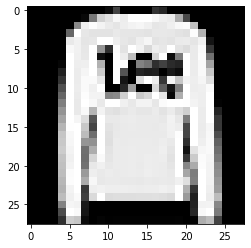

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_test[1].shape)
plt.imshow(X_test[1], cmap='gray')
plt.show()

Normalize The Data - Feature scaling

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

Split the data into train, vaildation, test sets

In [ ]:
# splitting the train set to validation as well since its already split into train-test
train_x, validation_x, train_y, validation_y = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
class MyDataset(data.Dataset):
  def __init__(self,X,Y):
    self.X = X
    self.Y = Y
  def __len__(self):
    return len(self.Y)
  def __getitem__(self,index):
    X = self.X[index].float().reshape(-1)
    Y = self.Y[index].long()
    return X,Y

### Prepare the data

In [ ]:
train_dataset = MyDataset(torch.from_numpy(train_x).float(),torch.from_numpy(train_y))
train_loader_args = dict(shuffle = True,batch_size = 256, num_workers = 0)
train_loader = DataLoader(train_dataset, **train_loader_args)

validation_dataset = MyDataset(torch.from_numpy(validation_x).float(),torch.from_numpy(validation_y))
validation_loader_args = dict(shuffle = True,batch_size = 256, num_workers = 0)
validation_loader = DataLoader(validation_dataset, **validation_loader_args)

test_dataset = MyDataset(torch.from_numpy(X_test).float(),torch.from_numpy(y_test))
test_loader_args = dict(shuffle = True,batch_size = 256, num_workers = 0)
test_loader = DataLoader(test_dataset, **test_loader_args)

<ipython-input-6-a25e01e5af9c>:9: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:199.)
  test_dataset = MyDataset(torch.from_numpy(X_test).float(),torch.from_numpy(y_test))


<h3>The Neural Network</h3>

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self,layer_list):
    super(NeuralNetwork,self).__init__()
    layers = []
    self.layer_list = layer_list
    for i in range(len(layer_list)-2):
        layers.append(nn.Linear(layer_list[i],layer_list[i+1]))
        layers.append(nn.ReLU())
    layers.append(nn.Linear(layer_list[-2],layer_list[-1]))
    self.net = nn.Sequential(*layers)

  def forward(self, x):
    return self.net(x)

  def predict(self, data):
    data = data.to(device)
    model = self
    return model(data.reshape(-1)).argmax().item()

  def predictAll(self, data):
    predictions = []
    data = data.to(device)
    model = self
    for i in range(len(data)):
      predictions.append(model(data[i].reshape(-1)).argmax().item())
    return predictions

### Epoch Helper Functions

Train Epoch

In [ ]:
def train_part2(model,train_loader,criterion,optimizer):
    model.train()
    model.to(device)
    running_loss = 0.0
    correct_values = 0.0
    for batch_idx,(data,target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        outputs = model(data)
        loss = criterion(outputs,target)
        running_loss += loss.item()

        loss.backward()
        optimizer.step()

        _,predicted = torch.max(outputs.data,1)
        correct_values += (predicted==target).sum().item()

    running_loss /= len(train_loader)
    correct_values = correct_values/(len(train_loader.dataset.Y))*100
    return running_loss,correct_values


Validation Epoch

In [ ]:
def validation(model,data_loader,criterion):
  with torch.no_grad():
    model.eval()
    model.to(device)
    running_loss = 0.0
    accuracy = 0
    for batch_idx,(data,target) in enumerate(data_loader):
      data = data.to(device)
      target = target.to(device)
      outputs = model(data)
      _,predicted = torch.max(outputs.data,1)

      loss = criterion(outputs,target).detach()
      running_loss += loss.item()

      accuracy += (predicted==target).sum().item()

    running_loss /= len(data_loader)
    acc = (accuracy/len(data_loader.dataset.Y))*100.0
    return running_loss,acc

In [ ]:
def compare(graph1,graph2,label):
  plt.plot(graph1,color='b',label='train'),plt.plot(graph2,color='r',label='val')
  plt.xlabel('epochs')
  plt.ylabel(label)
  plt.legend()

## Models

### Base Model

In [ ]:
# simple 784 neurons (the size of the pictures = 28x28) to 10 neurons (classification = 10 classes)
base = NeuralNetwork([784,10]).to(device)
print(base)

NeuralNetwork(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
  )
)


Loss Function

In [ ]:
loss = nn.CrossEntropyLoss()

Optimizer

In [ ]:
optimizer = optim.SGD(base.parameters(), lr= 0.01)

#### Trainning Proccess

In [ ]:
numner_of_epochs = 15

train_loss=[]
train_acc=[]
validation_loss=[]
validation_acc=[]

for epoch in range(numner_of_epochs):
  base_loss, base_acc = train_part2(base,train_loader,loss,optimizer)
  train_loss.append(base_loss)
  train_acc.append(base_acc)

  base_validation_loss, base_validation_acc = validation(base,validation_loader,loss)
  validation_loss.append(base_validation_loss)
  validation_acc.append(base_validation_acc)

In [ ]:
print(train_loss)
print(train_acc)

[1.466832468455488, 0.9873293834653768, 0.8581572517075322, 0.7906184396283193, 0.7465657828883692, 0.714479039338502, 0.6895699846473607, 0.6696150973439217, 0.653086228465492, 0.6387853178788315, 0.6266529715873979, 0.6159517531367865, 0.6067641223357483, 0.5980520368638363, 0.5905777803537521]
[61.89555555555556, 69.86, 73.09777777777778, 75.07555555555555, 76.50222222222223, 77.51333333333334, 78.15777777777778, 78.87777777777778, 79.35333333333332, 79.81333333333333, 80.09111111111112, 80.37111111111112, 80.56, 80.84222222222223, 81.07111111111112]


#### Train & Validation set Comparison

Loss Comparison

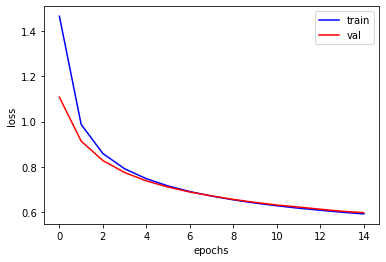

In [ ]:
compare(train_loss,validation_loss,'loss')

Accuracy Comparison

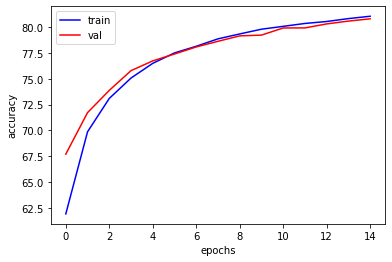

In [ ]:
compare(train_acc,validation_acc,'accuracy')

<h3>Test</h3>

In [ ]:
y_pred = base.predictAll(torch.from_numpy(X_test).float())

#### Model Evaluation

In [ ]:
print("base model accuracy:", accuracy_score(test_dataset.Y.tolist(),y_pred))

base model accuracy: 0.799


In [ ]:
target_names = [str(i) for i in range(10)]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1000
           1       0.97      0.93      0.95      1000
           2       0.69      0.69      0.69      1000
           3       0.79      0.85      0.82      1000
           4       0.67      0.77      0.72      1000
           5       0.95      0.77      0.85      1000
           6       0.58      0.45      0.50      1000
           7       0.82      0.89      0.85      1000
           8       0.89      0.93      0.91      1000
           9       0.85      0.94      0.89      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



### Experiment #1

In [ ]:
ex1 = NeuralNetwork([784,256,10]).to(device)
print(ex1)

NeuralNetwork(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=10, bias=True)
  )
)


Loss Function

In [ ]:
loss = nn.CrossEntropyLoss()

Optimizer

In [ ]:
optimizer = optim.SGD(ex1.parameters(), lr= 0.01)

#### Trainning Proccess

In [ ]:
numner_of_epochs = 15

train_loss=[]
train_acc=[]
validation_loss=[]
validation_acc=[]

for epoch in range(numner_of_epochs):
  ex1_loss, ex1_acc = train_part2(ex1,train_loader,loss,optimizer)
  train_loss.append(ex1_loss)
  train_acc.append(ex1_acc)

  ex1_validation_loss, ex1_validation_acc = validation(ex1,validation_loader,loss)
  validation_loss.append(ex1_validation_loss)
  validation_acc.append(ex1_validation_acc)

In [ ]:
print(train_loss)
print(train_acc)

[1.8710765608332374, 1.2290151105685667, 0.965127223933285, 0.8457933979278262, 0.7764433666386388, 0.7284201278605245, 0.6911057000133124, 0.6613629646599293, 0.6365289945494045, 0.6160227707163854, 0.5978161680766128, 0.5823742085221139, 0.5693579128181393, 0.5574456392364069, 0.5473893532021479]
[52.22444444444444, 66.07777777777778, 68.35111111111111, 71.36888888888889, 73.63111111111111, 75.60666666666667, 77.06, 78.08444444444444, 78.94222222222223, 79.69333333333334, 80.22888888888889, 80.71777777777778, 81.10888888888888, 81.50444444444445, 81.7511111111111]


#### Train & Validation set Comparison

Loss Comparison

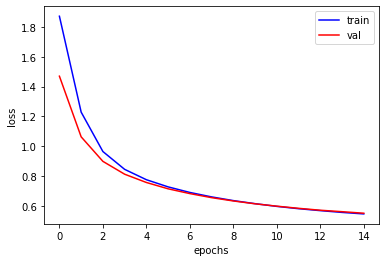

In [ ]:
compare(train_loss,validation_loss,'loss')

Accuracy Comparison

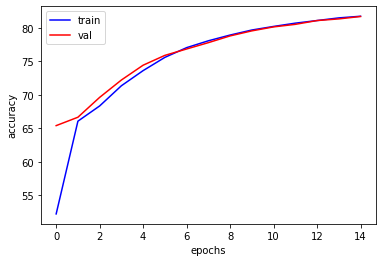

In [ ]:
compare(train_acc,validation_acc,'accuracy')

Test

In [ ]:
y_pred = ex1.predictAll(torch.from_numpy(X_test).float())

#### Model Evaluation

In [ ]:
print("experiment 1 accuracy:", accuracy_score(test_dataset.Y.tolist(),y_pred))

experiment 1 accuracy: 0.8042


In [ ]:
target_names = [str(i) for i in range(10)]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1000
           1       0.97      0.93      0.95      1000
           2       0.68      0.71      0.70      1000
           3       0.78      0.86      0.82      1000
           4       0.68      0.75      0.71      1000
           5       0.93      0.82      0.87      1000
           6       0.59      0.43      0.50      1000
           7       0.84      0.88      0.86      1000
           8       0.91      0.94      0.92      1000
           9       0.86      0.94      0.90      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



### Experiment #2

In [ ]:
ex2 = NeuralNetwork([784,10]).to(device)
print(ex2)

NeuralNetwork(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
  )
)


Loss Function

In [ ]:
loss = nn.CrossEntropyLoss()

Optimizer

In [ ]:
optimizer = optim.Adam(ex2.parameters())

Changing batch size

In [ ]:
train_dataset = MyDataset(torch.from_numpy(train_x).float(),torch.from_numpy(train_y))
train_loader_args = dict(shuffle = True,batch_size = 96, num_workers = 0)
train_loader = DataLoader(train_dataset, **train_loader_args)

validation_dataset = MyDataset(torch.from_numpy(validation_x).float(),torch.from_numpy(validation_y))
validation_loader_args = dict(shuffle = True,batch_size = 96, num_workers = 0)
validation_loader = DataLoader(validation_dataset, **validation_loader_args)

test_dataset = MyDataset(torch.from_numpy(X_test).float(),torch.from_numpy(y_test))
test_loader_args = dict(shuffle = True,batch_size = 96, num_workers = 0)
test_loader = DataLoader(test_dataset, **test_loader_args)

####Trainning Proccess

In [ ]:
numner_of_epochs = 7

train_loss=[]
train_acc=[]
validation_loss=[]
validation_acc=[]

for epoch in range(numner_of_epochs):
  ex2_loss, ex2_acc = train_part2(ex2,train_loader,loss,optimizer)
  train_loss.append(ex2_loss)
  train_acc.append(ex2_acc)

  ex2_valid_loss, ex2_valid_acc = validation(ex2,validation_loader,loss)
  validation_loss.append(ex2_valid_loss)
  validation_acc.append(ex2_valid_acc)

In [ ]:
print(train_loss)
print(train_acc)

[0.734896283731786, 0.5188809706966506, 0.476399292251957, 0.4552652919089108, 0.44085394262250804, 0.42959773289496456, 0.4216701306386797]
[75.92, 82.74444444444444, 83.94666666666667, 84.60666666666667, 85.10444444444445, 85.3711111111111, 85.51777777777778]


#### Train & Validation set Comparison

Loss Comparison

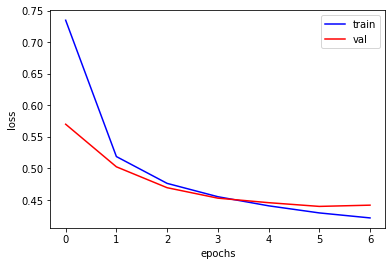

In [ ]:
compare(train_loss,validation_loss,'loss')

Accuracy Comparison

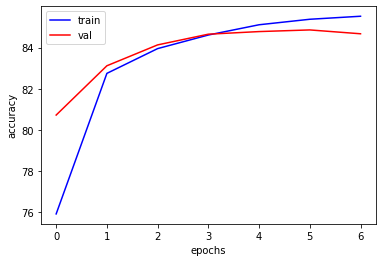

In [ ]:
compare(train_acc,validation_acc,'accuracy')

Test

In [ ]:
y_pred = ex2.predictAll(torch.from_numpy(X_test).float())

#### Model Evaluation

In [ ]:
print("experiment 2 accuracy:", accuracy_score(test_dataset.Y.tolist(),y_pred))

experiment 2 accuracy: 0.8306


In [ ]:
target_names = [str(i) for i in range(10)]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.87      0.68      0.76      1000
           1       0.98      0.95      0.96      1000
           2       0.78      0.65      0.70      1000
           3       0.82      0.87      0.84      1000
           4       0.72      0.76      0.74      1000
           5       0.95      0.90      0.93      1000
           6       0.53      0.68      0.59      1000
           7       0.90      0.93      0.92      1000
           8       0.94      0.94      0.94      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



### Save The Best Model

In [ ]:
%%script echo skipping
PATH = "/content/gdrive/My Drive/DL/Assignment 2/DL2_p2.pt"
torch.save(ex2.state_dict(), PATH)

skipping


# Test Environment (of part 2 only)
This part is meant to show the tester how your model is performing. Keep in mind that the only cells he is going to run are the cells below.<br>
(If there are libraries that need to be used please add their import. If there is a process that the data has to go through before it enters the model, don't forget to add it as well).

### Load trained model

In order to load the model and use it:


1.   run the imports section below
2.   check that you have 'DL2_p2' in the notebook's files (thats the saved model of part 2)
3.   run the code below



In [ ]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils import data
from google.colab import drive

!gdown --id 1eK_D8v71BPK_lSdc9du_M3xK9tGBcQO1
!gdown --id 1ZdoMtDy9Di0NH9EWIaAy1dwYaPqYsy2x
!gdown --id 1bl1RKHroQtmOr9KiL7IMRtcWSyqsNww2

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1eK_D8v71BPK_lSdc9du_M3xK9tGBcQO1
To: /content/DL2_p2.pt
100% 816k/816k [00:00<00:00, 149MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZdoMtDy9Di0NH9EWIaAy1dwYaPqYsy2x
To: /content/DL2_p1.pt
100% 33.0k/33.0k [00:00<00:00, 51.2MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bl1RK

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self,layer_list):
    super(NeuralNetwork,self).__init__()
    layers = []
    self.layer_list = layer_list
    for i in range(len(layer_list)-2):
        layers.append(nn.Linear(layer_list[i],layer_list[i+1]))
        layers.append(nn.ReLU())
    layers.append(nn.Linear(layer_list[-2],layer_list[-1]))
    self.net = nn.Sequential(*layers)

  def forward(self, x):
    return self.net(x)

  def predict(self, data):
    data = data.to(device)
    model = self
    return model(data.reshape(-1)).argmax().item()

  def predictAll(self, data):
    predictions = []
    data = data.to(device)
    model = self
    for i in range(len(data)):
      predictions.append(model(data[i].reshape(-1)).argmax().item())
    return predictions

In [ ]:
filename = "DL2_p2.pt"
model = NeuralNetwork([784,256,10])
model.load_state_dict(torch.load(filename))
model.eval()

NeuralNetwork(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=10, bias=True)
  )
)

### Single prediction
Let the tester examine your trained model on single predicttion test.<br>You will use the colab.file library to allow the tester to upload a single image of an item of clothing (28x28 image).<br>
Then build a function that takes this image, loads the weights of the trained model (If you haven't loaded it before) and prints a prediction.

In [ ]:
from numpy import load as load_npy
from google.colab import files
uploaded = files.upload()

Saving ankle_boot_9.npy to ankle_boot_9.npy


In [ ]:
labels_dict = {
  0:'T-shirt/top',
  1:'Trouser',
  2:'Pullover',
  3:'Dress',
  4:'Coat',
  5:'Sandal',
  6:'Shirt',
  7:'Sneaker',
  8:'Bag',
  9:'Ankle boots',
}

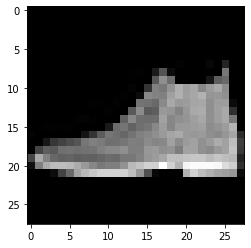

prediction: 9 - Ankle boots


In [ ]:
np_image = np.load(list(uploaded.keys())[0])
normalize_image = np_image/255.0
plt.imshow(np_image, cmap='gray')
plt.show()
prediction_input = np.array([normalize_image.reshape(-1)])
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
prediction = model.predict(torch.from_numpy(prediction_input).float())
print("prediction:", prediction, "-", labels_dict[prediction])